In [1]:
import pandas as pd

In [2]:
from preprocessing import *

In [3]:
df = pd.read_csv("data/CTU-13-Dataset/10/capture20110818.binetflow")

In [4]:
df.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309791 entries, 0 to 1309790
Data columns (total 15 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   StartTime  1309791 non-null  object 
 1   Dur        1309791 non-null  float64
 2   Proto      1309791 non-null  object 
 3   SrcAddr    1309791 non-null  object 
 4   Sport      1302804 non-null  object 
 5   Dir        1309791 non-null  object 
 6   DstAddr    1309791 non-null  object 
 7   Dport      1205576 non-null  object 
 8   State      1308563 non-null  object 
 9   sTos       1296939 non-null  float64
 10  dTos       1123000 non-null  float64
 11  TotPkts    1309791 non-null  int64  
 12  TotBytes   1309791 non-null  int64  
 13  SrcBytes   1309791 non-null  int64  
 14  Label      1309791 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 149.9+ MB


In [6]:
df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [7]:
df_encoded = encode_labels(df)
df_filtered = drop_background_flows(df_encoded)

In [8]:
df_encoded["Label"].value_counts()

2    1187592
1     106352
0      15847
Name: Label, dtype: int64

In [9]:
df_filtered["Label"].value_counts()

1    106352
0     15847
Name: Label, dtype: int64

In [10]:
df["TotBytes"].quantile(0.75)

1066.0

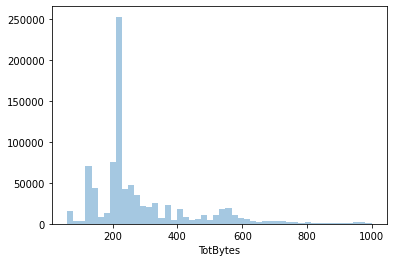

In [47]:
sns.distplot(df[df["TotBytes"]<1000]["TotBytes"], kde=False)